# End-to-End Web Traffic Analysis Using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("01_website data.csv")

In [3]:
df.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   # ----------------------------------------  3183 non-null   object
 1   Unnamed: 1                                  3183 non-null   object
 2   Unnamed: 2                                  3183 non-null   object
 3   Unnamed: 3                                  3183 non-null   object
 4   Unnamed: 4                                  3183 non-null   object
 5   Unnamed: 5                                  3183 non-null   object
 6   Unnamed: 6                                  3183 non-null   object
 7   Unnamed: 7                                  3183 non-null   object
 8   Unnamed: 8                                  3183 non-null   object
 9   Unnamed: 9                                  3183 non-null   object
dtypes: object(10)
memory usa

In [5]:
 df.columns = df.iloc[0]
 df = df.drop(index = 0).reset_index(drop = True)
 df.columns = ["channel group", "datehour", "users", "sessions", "Engaged sessions", "Average engagement time per session", "Engaged sessions per user",
               "Events per session", "Engagement rate", "Event count"]

In [6]:
df.head(5)

,channel group,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [7]:
df.tail(5)

,channel group,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
3177,Unassigned,2024042806,0,1,0,0,0,2,0,2
3178,Unassigned,2024043005,0,1,0,0,0,2,0,2
3179,Unassigned,2024043006,0,1,0,0,0,2,0,2
3180,Unassigned,2024050105,0,1,0,0,0,2,0,2
3181,Unassigned,2024050307,0,1,0,0,0,2,0,2


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

channel group                          0
datehour                               0
users                                  0
sessions                               0
Engaged sessions                       0
Average engagement time per session    0
Engaged sessions per user              0
Events per session                     0
Engagement rate                        0
Event count                            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   datehour                             3182 non-null   object
 2   users                                3182 non-null   object
 3   sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [11]:
 df["datehour"] = pd.to_datetime(df["datehour"], format="%Y%m%d%H", errors='coerce')

In [12]:
 numeric_cols = df.columns.drop(["channel group", "datehour"])
 df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
 df["Hour"] = df["datehour"].dt.hour

In [13]:
df.head(5)

,channel group,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [14]:
df["channel group"].value_counts()

channel group
Direct            672
Organic Social    672
Organic Search    672
Referral          672
Unassigned        366
Organic Video     125
Email               3
Name: count, dtype: int64

In [15]:
df.describe()

,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# Exploratory Data Analysis

In [16]:
df['datehour'] = pd.to_datetime(df['datehour'], format='%Y%m%d%H')
df['date'] = df['datehour'].dt.date
df['hour'] = df['datehour'].dt.hour

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   datehour                             3182 non-null   datetime64[ns]
 2   users                                3182 non-null   int64         
 3   sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

#Find peak user hours

In [18]:
df['hour'].value_counts()

hour
19    144
20    143
14    142
16    142
15    142
22    141
10    138
21    138
12    138
18    136
11    135
17    135
13    133
0     131
9     131
23    130
6     126
1     125
2     124
8     123
7     123
3     121
5     121
4     120
Name: count, dtype: int64

C:\Users\Aritra\AppData\Local\Temp\ipykernel_4900\601603103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='users', data=df, palette='Greens_d')


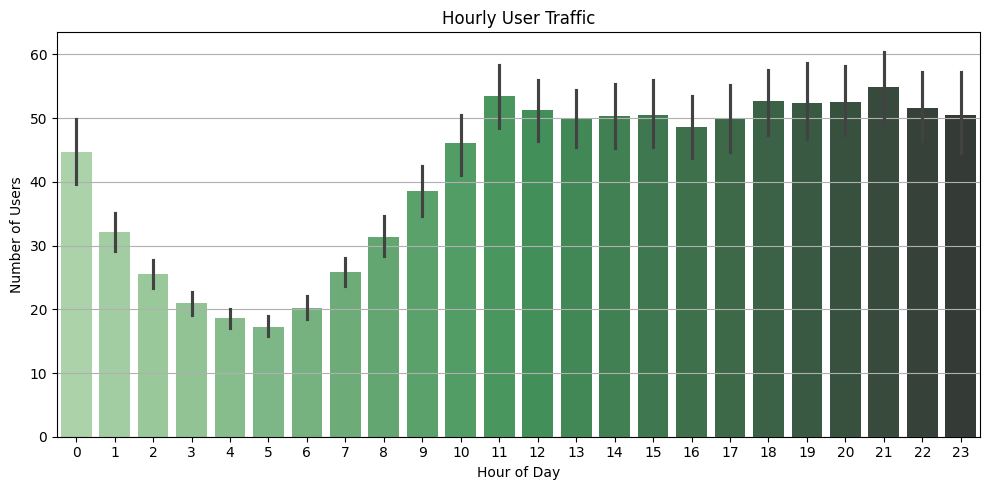

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='users', data=df, palette='Greens_d')
plt.title('Hourly User Traffic')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Users')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#Dates bring the most traffic

C:\Users\Aritra\AppData\Local\Temp\ipykernel_4900\3385882858.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date', y='sessions', data=top_5_sessions, palette='Spectral')


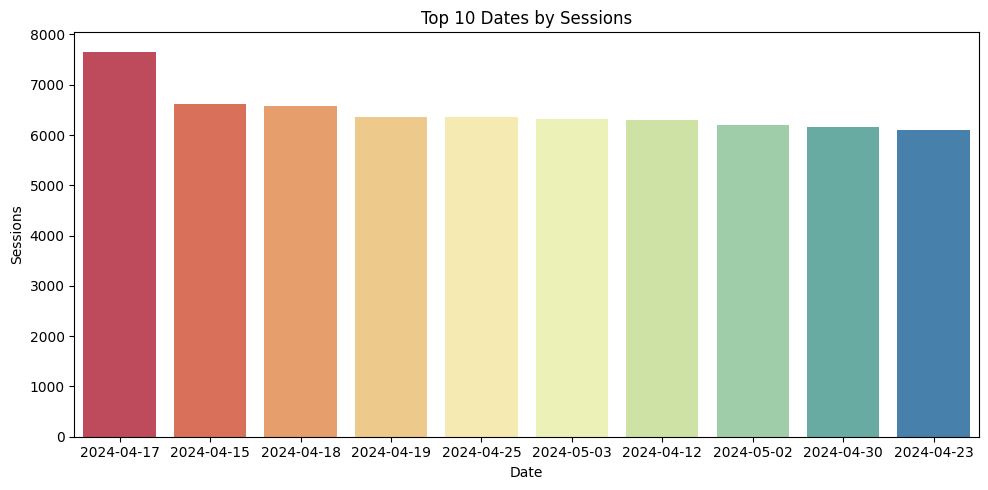

In [20]:
daily_sessions = df.groupby('date')['sessions'].sum().reset_index()
top_5_sessions = daily_sessions.sort_values(by='sessions', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='date', y='sessions', data=top_5_sessions, palette='Spectral')
plt.title('Top 10 Dates by Sessions')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.tight_layout()
plt.show()

#Traffic by Hour and Channel

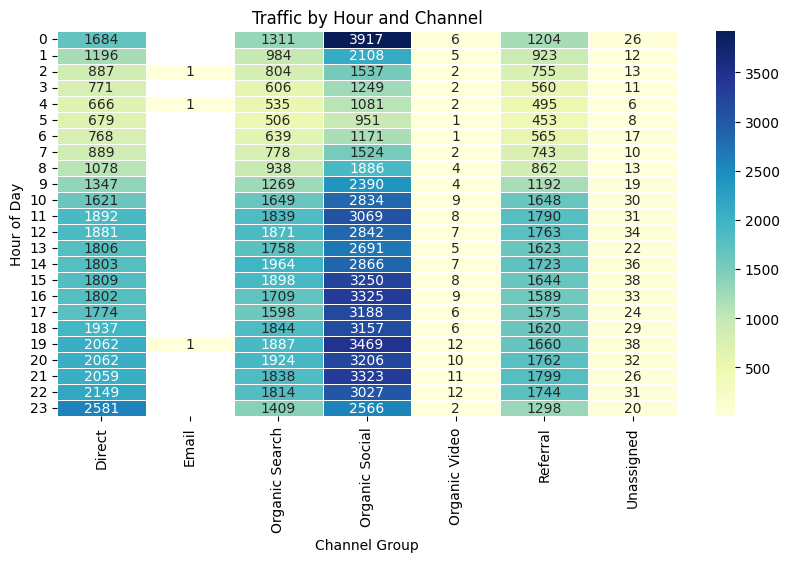

In [21]:
heatmap_data = df.groupby(["Hour", "channel group"])["sessions"].sum().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()